### Homework 9
### K-Means clustering

In [129]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

Make some dummy data

In [29]:
#Create some dummy data :
n_samples = 150
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5)

### Plot the data to verify

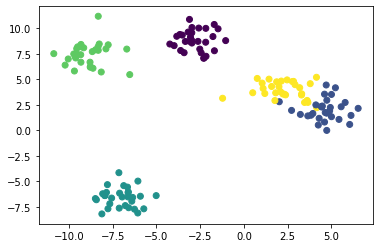

In [30]:
#Let's plot the data : 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

### Write your own K-Means clustering algorithm.  Do not use sklean or any other tools.  Just python and numpy are allowed.  Use K=5 for this problem.  Your goal is to use the K-Means algorithm to compute your own clusters, then compare the results to the clusters assigned by the make_blobs function.  See if they are close by looking at the plot.  Because the cluster numbers will not line up with the original cluster numbers, all you can do is look at the plots.

### K-Means Algorithm Steps

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: Compute the new centroid of each cluster.

Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

In [31]:
# Step 1: Select value of K, to decide the number of clusters to be formed.

# There are more formal ways of choosing the K, but the assignment literaly says to use 5.
k = 10

In [32]:
# Step 2: Select random K points which will act as 

# Selecting a k random clusters
centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = pd.DataFrame(centroids)



Starting Centroids           0         1
0 -3.837384  9.211147
1 -6.956729 -6.538958
2 -7.103090 -6.166109
3 -8.774048  6.245778
4 -6.057567 -4.983317
5 -9.553631  8.003121
6 -8.480540  7.884307
7 -7.854309 -6.093025
8 -8.152068  5.710807
9  2.303292  3.538752


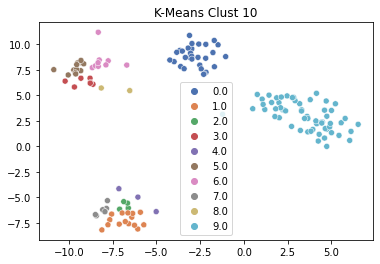

In [134]:
# Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), 
# to the nearest/closest centroid which will form the predefined clusters.
def Euclidean_D(point1, point2):
    """This Function Finds the distance between two points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2))
    return dist

def assign_clusters(centroids, df, k):
    """This Assigns Clusters to closest centroid"""
    np.random.shuffle(df)
    print("Starting Centroids", centroids)
    
    min_center_list = []
    # # Going through each of the rows
    for row in df:
        # Creating a list of the Euclidean Distances to each centroid
        euclide_list = [Euclidean_D(row, centroids.iloc[i].values) for i in range(len(centroids))]
    
        # Adding Min Center to the list
        min_center_list.append(euclide_list.index(pd.Index(euclide_list).min()))

    clusters = np.column_stack((df, min_center_list))

    sns.scatterplot(data=clusters, x=clusters[:,0], y=clusters[:,1], hue=clusters[:,2],palette='deep')
    np.column_stack((df, min_center_list))

    plt.title("K-Means Clust {}".format(k))
    


    return clusters
    

clusters = assign_clusters(centroids, X, k)


In [34]:
# Step-4: Compute the new centroid of each cluster.





In [35]:



# Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

# Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

# Step-7: FINISH

### Plot the cluster assignments to see if they look the same

### Calculate the Within Cluster Sum of Squares.  WCSS is the sum of the square of the distance between the point and its cluster center.

### Run a loop from k=1 to k=10 and compute WCSS for each value of K.  Plot the WCSS values for each value of K and identify the elbow.